# Модели классификации


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.1_classification/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# проверим данные на наличие проупущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
y = data.Outcome # целевая переменная
X = data.drop(["Outcome"], axis=1) # факторы

In [ ]:
from sklearn.model_selection import train_test_split #разбиение на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.shape, X.shape

((768,), (768, 8))

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [ ]:
logistic.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Смысл этого сообщения в том, что процесс обучения завершился по условию достижения максимального количества итераций, а не по условию стабилизации функции ошибки. Это значит, что модель обучается трудно и медленно. Это может свидетельствовать о том, что результаты могут быть не очень удовлетворительными.

In [ ]:
print("Coefficients: \n", logistic.coef_[0])

# В линейных моделях коэффициенты имеют физический смысл - они показывают значимость соответствующих признаков.

Coefficients: 
 [ 0.06578072  0.03383873 -0.01358047  0.00417869 -0.00180471  0.10095239
  0.61796629  0.03483591]


In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.06578071846675132
Glucose 0.0338387287271113
BloodPressure -0.013580473827176486
SkinThickness 0.004178688517751481
Insulin -0.001804709634403133
BMI 0.1009523904160635
DiabetesPedigreeFunction 0.6179662866503458
Age 0.034835908169221164


In [ ]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.87929147]


In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 0
0 0
1 0
0 0
1 0
0 0
1 0
0 1
1 1
1 1


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]], dtype=int64)

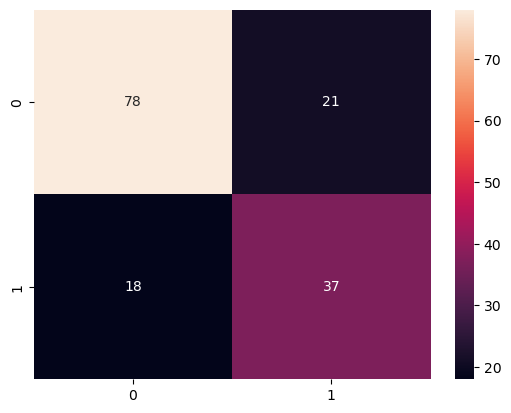

In [ ]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True);

In [ ]:
logistic.score(X_test, y_test)

0.7467532467532467

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7467532467532467

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)

In [ ]:
polynomial = LogisticRegression()
polynomial.fit(poly_train, y_train)
y_pred_poly = polynomial.predict(poly_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


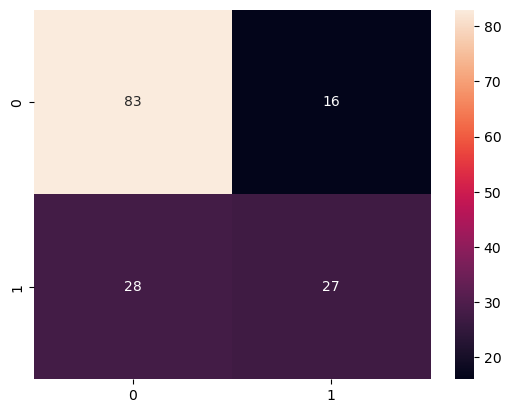

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_poly), annot=True);

In [ ]:
metrics.accuracy_score(y_test, y_pred_poly)

0.7142857142857143

In [ ]:
polynomial.score(poly_test, y_test)

0.7142857142857143

#### Задания для самостоятельного выполнения

1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
logistic.predict_proba(X_train) #вероятность принадлежности объекта к каждому классу

array([[0.99321249, 0.00678751],
       [0.5323926 , 0.4676074 ],
       [0.67637266, 0.32362734],
       ...,
       [0.30743865, 0.69256135],
       [0.21260818, 0.78739182],
       [0.94203952, 0.05796048]])

In [ ]:
logistic.classes_ #метки классов

array([0, 1], dtype=int64)

In [ ]:
logistic.decision_function(X_train) #мера близости объекта к границе разделения классов, чем больше - тем больше вероятность принадлежности к положительному классу

array([-4.98586100e+00, -1.29752117e-01, -7.37151535e-01,  5.21874983e-01,
        8.63741685e-01, -1.82754377e+00,  1.59728949e-01,  5.73997634e-01,
       -1.42644746e+00, -4.03415848e+00, -1.82874778e+00,  1.79572359e+00,
       -2.95560791e+00, -9.22811617e-01,  1.17446539e+00,  2.80267382e-01,
        4.33595016e-01, -1.50650268e+00, -7.06600678e-01,  9.30063006e-01,
        2.27950337e-01, -2.38615757e+00, -9.55317966e-01, -9.65816530e-01,
       -1.28373238e+00, -8.77506152e-01,  2.79432784e-02,  1.19628896e-01,
       -5.13909612e-01,  1.19429836e+00,  5.58047002e-01, -2.21782777e+00,
       -3.05305459e+00, -1.96002888e+00,  1.52824666e+00, -4.97889389e-01,
       -2.55813522e+00, -2.39977797e+00,  2.37881769e+00, -1.33518617e+00,
       -2.38900262e+00, -2.81147251e+00, -5.26513605e+00, -2.62546090e+00,
       -1.07516906e+00,  6.97966765e-01, -1.84105306e+00, -2.01629918e+00,
       -5.48359031e-01, -9.77860613e-01,  7.18283913e-01, -2.25051844e+00,
       -2.02274637e+00, -

In [ ]:
logistic_1 = LogisticRegression(penalty='l1', solver='liblinear')
#регуляризация L1 приводит к выбору наиболее важных признаков, L2 снижает переобучение модели
#solver отвечает за метод оптимизации, liblinear использует методы координатного спуска
logistic_1.fit(X_train, y_train)
logistic_1.score(X_test, y_test)

0.7532467532467533

In [ ]:
logistic_1 = LogisticRegression(penalty='l2', solver='sag')
#sag - стохастический средний градиентный спуск, только с L2
logistic_1.fit(X_train, y_train)
logistic_1.score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7012987012987013

In [ ]:
logistic_2 = LogisticRegression(C=0.00005)
#Меньшее значение C(параметр регуляризации) соответствует более сильному штрафу за большие значения весов
logistic_2.fit(X_train, y_train)
logistic_2.score(X_test, y_test)

0.7662337662337663

In [ ]:
logistic_3 = LogisticRegression(max_iter=10)
#Максимальное число итераций при обучении модели
logistic_3.fit(X_train, y_train)
logistic_3.score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6753246753246753

In [ ]:
logistic_3 = LogisticRegression(max_iter=10000)
#Максимальное число итераций при обучении модели
logistic_3.fit(X_train, y_train)
logistic_3.score(X_test, y_test)

0.7467532467532467

2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности.

i. Метод опорных векторов

    Без ядра

0.7532467532467533


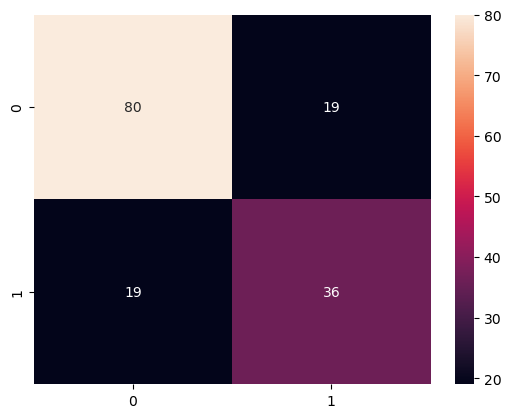

In [ ]:
from sklearn.svm import SVC #классификатор опорных векторов
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics

clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)

print(accuracy_score(y_test, y_pred3))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred3), annot=True); #визуализация матрицы ошибок
#TN FN
#FP TP


    С линейным ядром (то же самое)

0.7532467532467533


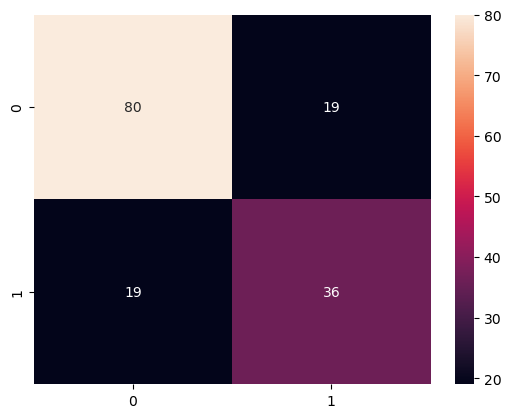

In [ ]:
clf = SVC(kernel='linear', C=1)
#используется линейное ядро, которое позволяет SVM создавать гиперплоскости для разделения данных.
clf.fit(X_train, y_train)

y_pred3 = clf.predict(X_test)

print(accuracy_score(y_test, y_pred3))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred3), annot=True);

    С гауссовым ядром

0.7662337662337663


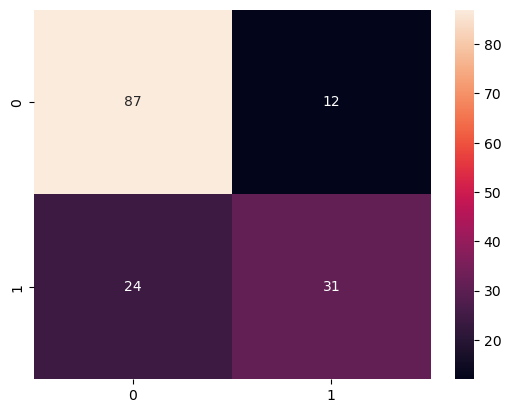

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf2 = SVC(kernel='rbf', gamma='scale', C=1)
# scale - ширина ядра (по умолчанию, зависит от числа признаков и дисперсии)
clf2.fit(X_train, y_train)
y_pred4 = clf2.predict(X_test)

print(accuracy_score(y_test, y_pred4))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred4), annot=True);

    С полиноминальным ядром

0.7597402597402597


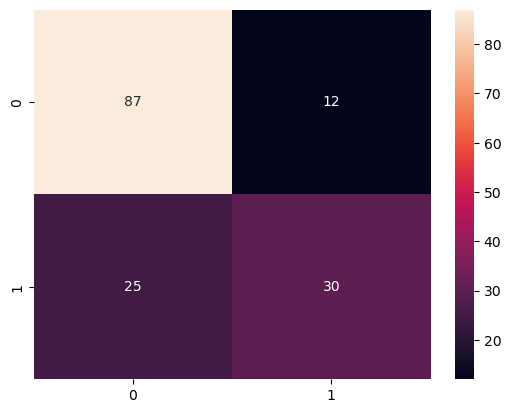

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf3 = SVC(kernel='poly', C=1, degree=3)
#С - коэффициент регуляризации, degree - степень полинома
clf3.fit(X_train, y_train)
y_pred5 = clf3.predict(X_test)

print(accuracy_score(y_test, y_pred5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred5), annot=True);

ii. Метод ближайших соседей

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7792207792207793


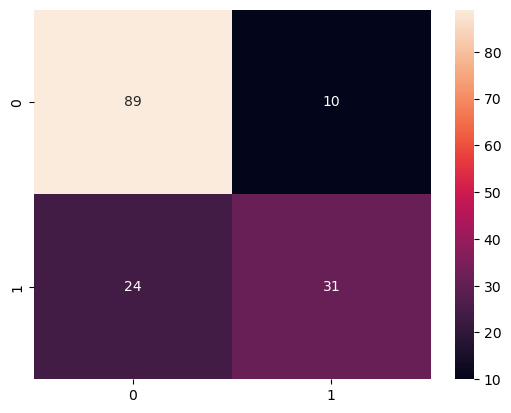

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf4 = KNeighborsClassifier(n_neighbors=12)
#n-neighbors - количество ближайших соседей, используемые для классификации нового примера.
clf4.fit(X_train, y_train)
y_pred6 = clf4.predict(X_test)

print(accuracy_score(y_test, y_pred6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred6), annot=True);

iii. Многослойный перцептрон

0.7272727272727273


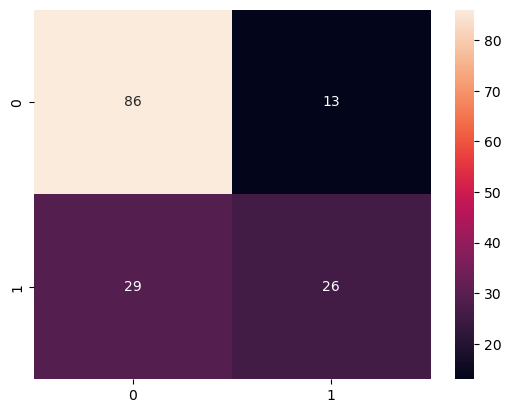

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf5 = MLPClassifier(hidden_layer_sizes=(15, 5), activation='relu', solver='adam', alpha=0.0001, max_iter=200, random_state=42)

#hidden_layer_sizes - количество нейронов в каждом скрытом слое
#activation - функция активации нейронов (позволяет моделировать более сложные зависимости между входными и выходными данными)
#solver - метод оптимизации весов (влияет на обновление веса)
#alpha - коэффициент регуляризации  (предотовращение переобучения модели)
#max_iter - максимальное количество итераций
#random_state - установка начального состояния генератоар случайных чисел

clf5.fit(X_train, y_train)

y_pred7 = clf5.predict(X_test)

print(accuracy_score(y_test, y_pred7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred7), annot=True);

iv. Дерево решений

0.7402597402597403


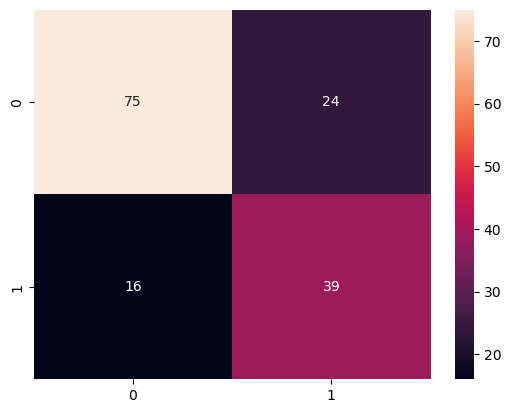

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf6 = DecisionTreeClassifier(max_depth=20)
#max-depth - максимальная глубина дерева
clf6.fit(X_train, y_train)
y_pred8 = clf6.predict(X_test)

print(accuracy_score(y_test, y_pred8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred8), annot=True);

v. Наивный байесовский классификатор

0.7662337662337663


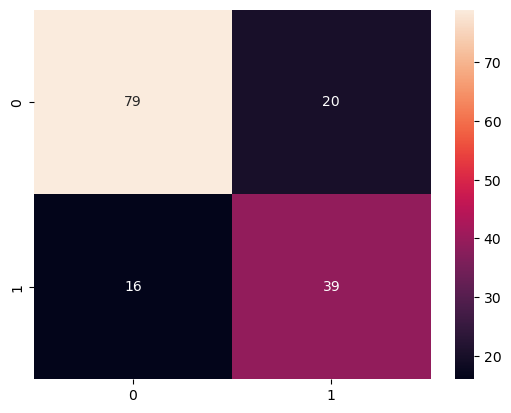

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf7 = GaussianNB()
clf7.fit(X_train, y_train)
y_pred9 = clf7.predict(X_test)

print(accuracy_score(y_test, y_pred9))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred9), annot=True);

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
def train_run_models(X_train, y_train, X_test, y_test):
    models = [
        ('Логистическая регрессия', LogisticRegression()),
        ('Метод опорных векторов:\nС линейным ядром', SVC(kernel='linear')),
        ('С Гауссовым ядром', SVC(kernel='rbf')),
        ('С полиноминальным ядром', SVC(kernel='poly')),
        ('Метод ближайших соседей', KNeighborsClassifier()),
        ('Многослойный перцептрон', MLPClassifier()),
        ('Дерево решений', DecisionTreeClassifier()),
        ('Наивный байесовский классификатор', GaussianNB())
    ]

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name}: {accuracy}')

In [ ]:
train_run_models(X_train, y_train, X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логистическая регрессия: 0.7467532467532467
Метод опорных векторов:
С линейным ядром: 0.7532467532467533
С Гауссовым ядром: 0.7662337662337663
С полиноминальным ядром: 0.7597402597402597
Метод ближайших соседей: 0.6623376623376623


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Многослойный перцептрон: 0.7467532467532467
Дерево решений: 0.7662337662337663
Наивный байесовский классификатор: 0.7662337662337663


4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
#обучающая выборка 80%, тестовая 20%
train_run_models(X_train, y_train, X_test, y_test)

Логистическая регрессия: 1.0
Метод опорных векторов:
С линейным ядром: 1.0
С Гауссовым ядром: 1.0
С полиноминальным ядром: 1.0
Метод ближайших соседей: 1.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

Многослойный перцептрон: 1.0
Дерево решений: 1.0
Наивный байесовский классификатор: 1.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
